In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


In [3]:
# Change the path to where you extracted the files
df = pd.read_csv("bank-full.csv", sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print(df.shape)
print(df.info())
print(df['y'].value_counts())   # target variable


(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
y
no     39922
yes     5289
Name: count, dtype: int64


In [5]:
# Map target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Accuracy: 0.9002506635210852

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     11977
           1       0.66      0.30      0.41      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



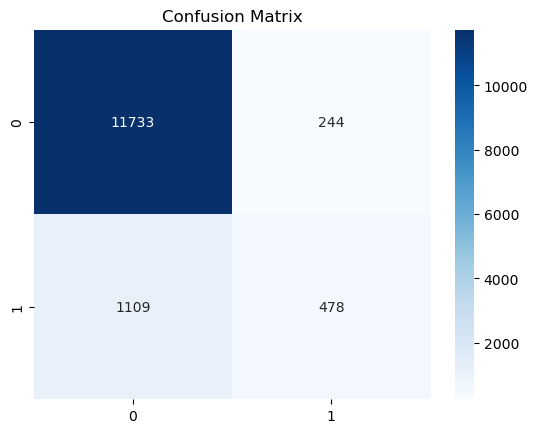

ROC AUC: 0.8465364117604319


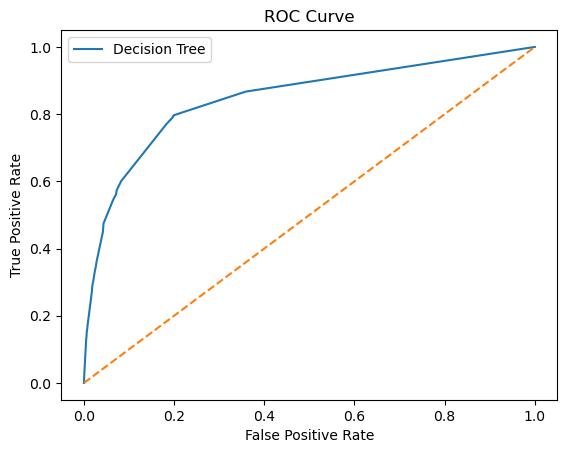

In [7]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC AUC
y_prob = clf.predict_proba(X_test)[:,1]
print("ROC AUC:", roc_auc_score(y_test, y_prob))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Decision Tree")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


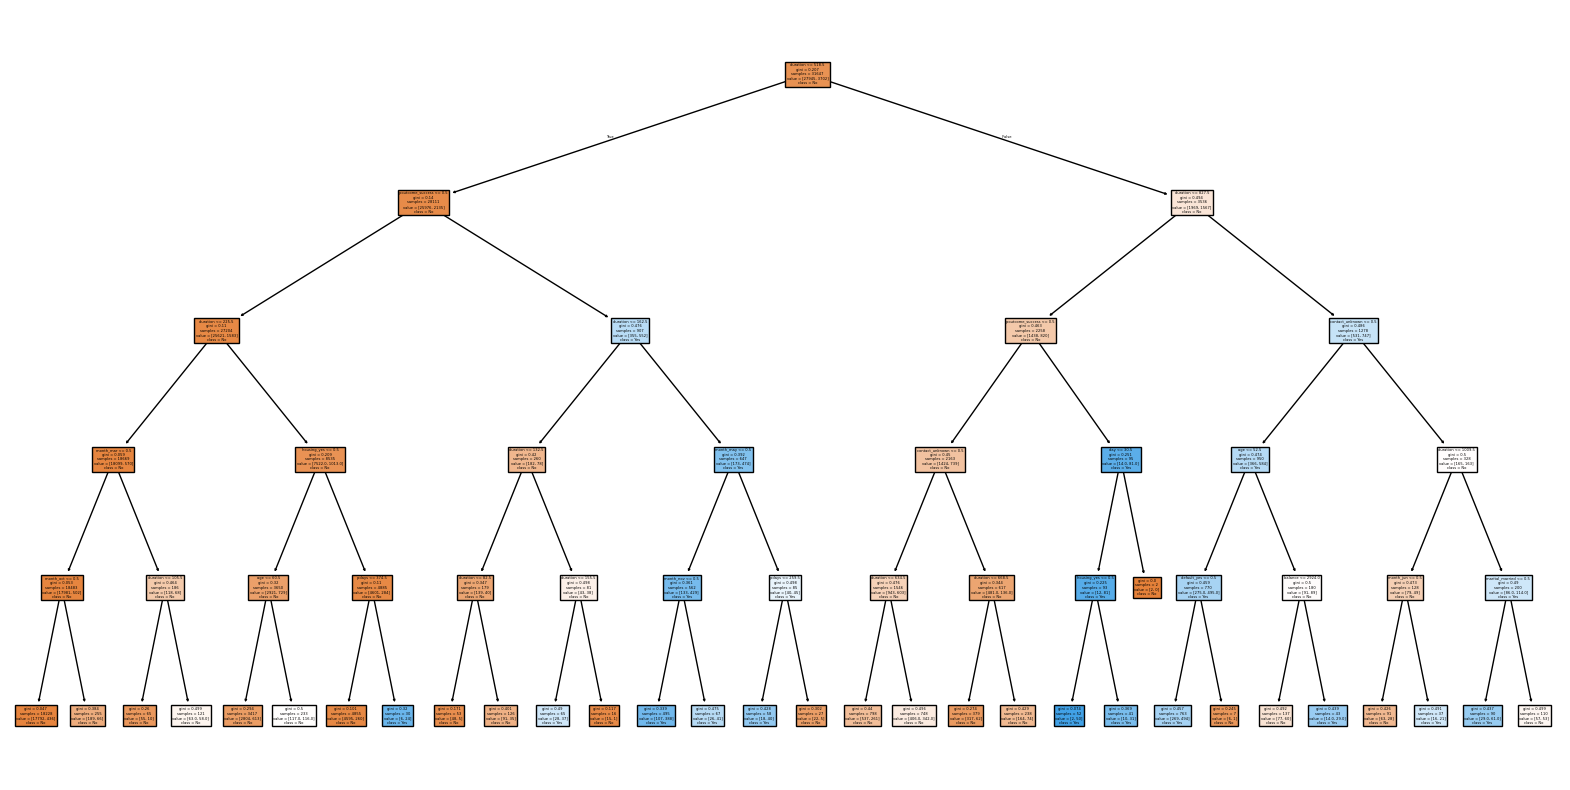

In [8]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No","Yes"], filled=True)
plt.show()


In [10]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_clf = grid.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("\nClassification Report after tuning:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     11977
           1       0.51      0.46      0.48      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.70      0.71     13564
weighted avg       0.88      0.89      0.88     13564

